# Visualize the dataset in data_clean.npz

In [4]:
import numpy as np
from numpy import pi as π
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("darkgrid")  # adds seaborn style to charts, eg. grid
plt.style.use("dark_background")  # inverts colors to dark theme
plt.rcParams['font.family'] = 'monospace'
np.set_printoptions(precision=3) # set precision for printing numpy arrays

In [5]:
# load data
data = np.load('data/data_clean.npz')
print(data.files)
for k in data.files:
    print(k, data[k].shape) 
sxr = data['sxr']
emiss = data['emiss']
#cehck all the values in x_emiss and y_emiss are the same
xemiss0, yemiss0 = data['x_emiss'][0], data['y_emiss'][0]
for xemiss, yemiss in zip(data['x_emiss'], data['y_emiss']):
    assert np.allclose(xemiss, xemiss0)
    assert np.allclose(yemiss, yemiss0)
rr, zz = data['x_emiss'][0], data['y_emiss'][0]
N = len(sxr)
del data

['label', 'shot', 'time', 'sxr', 'data_err', 'bessel_coefss', 'emiss', 'x_emiss', 'y_emiss', 'majr', 'minr', 'b_tor', 'b_rad', 'phi_tor']
label ()
shot (69352, 1)
time (69352, 1)
sxr (69352, 92)
data_err (69352, 92)
bessel_coefss (69352, 21)
emiss (69352, 110, 110)
x_emiss (69352, 110)
y_emiss (69352, 110)
majr (69352, 1)
minr (69352, 1)
b_tor (69352, 24)
b_rad (69352, 24)
phi_tor (69352, 24)


isxr: (92,), iemiss: (110, 110)
sxra: (16,), sxrb: (16,), sxrc: (17,), sxrd: (18,), sxre: (25,)


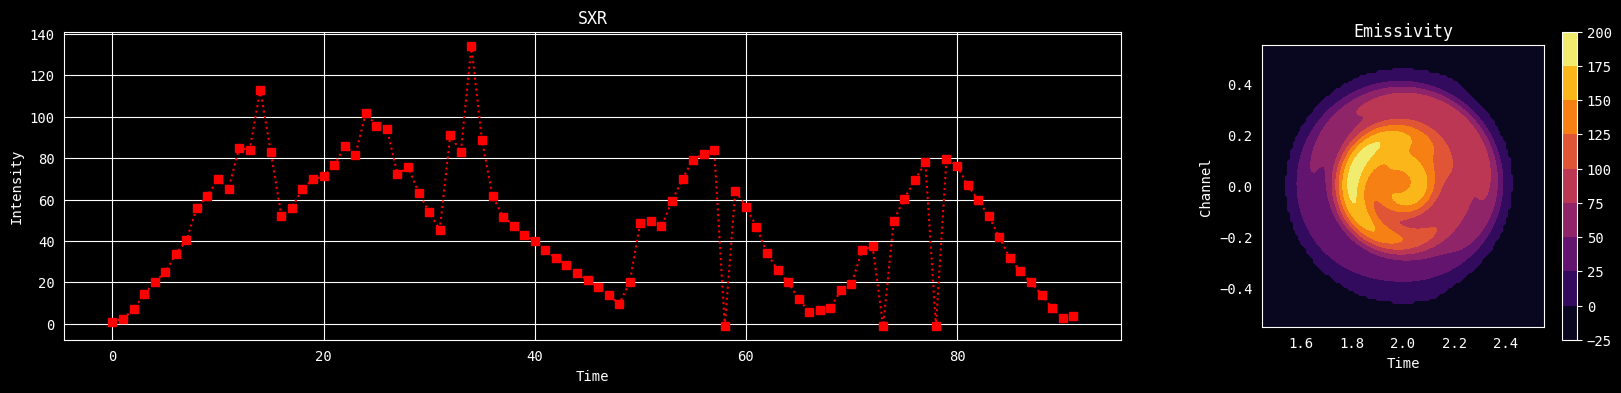

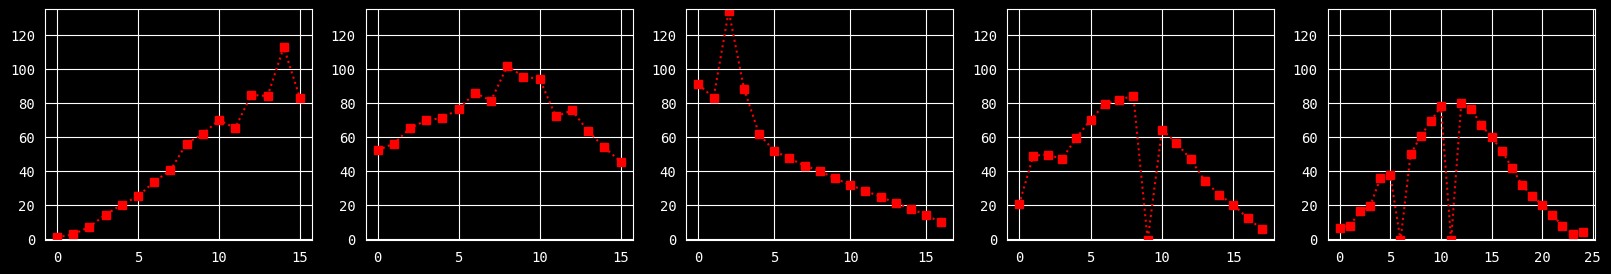

In [54]:
# plot sxr and emiss
random_idxs = np.random.choice(N, 1)
for i in random_idxs:
    isxr, iemiss = sxr[i], emiss[i]
    print(f'isxr: {isxr.shape}, iemiss: {iemiss.shape}')
    sxra = isxr[0:16]
    sxrb = isxr[16:32]
    sxrc = isxr[32:49]
    sxrd = isxr[49:67]
    sxre = isxr[67:]
    print(f'sxra: {sxra.shape}, sxrb: {sxrb.shape}, sxrc: {sxrc.shape}, sxrd: {sxrd.shape}, sxre: {sxre.shape}')
    # figure
    fig, ax = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [3, 1]})
    # sxr
    ax[0].plot(isxr, 'rs:')
    ax[0].set_title('SXR')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Intensity')
    # emiss
    ax[1].contourf(rr, zz, iemiss, cmap='inferno')
    ax[1].set_title('Emissivity')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Channel')
    ax[1].set_aspect("equal")
    fig.colorbar(ax[1].collections[0], ax=ax[1], orientation="vertical")
    plt.show()
    # sub sxr
    fig, ax = plt.subplots(1, 5, figsize=(20, 3))
    ax[0].plot(sxra, 'rs:')
    ax[1].plot(sxrb, 'rs:')
    ax[2].plot(sxrc, 'rs:')
    ax[3].plot(sxrd, 'rs:')
    ax[4].plot(sxre, 'rs:')
    for a in ax: a.set_ylim(-1, np.max(isxr)+1)
    plt.show()
    plt.close(fig)